In [1]:
import keras
import keras.applications as ka
import numpy as np
import sys
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=1,1

In [2]:
# Build model using resnet utility:

base_model = ka.ResNet50(
                        include_top=True,
                        weights=None,
                        classes=10,
                        input_shape = (32, 32, 3)
                        )

# base_model_add_layers = keras.Model(inputs = base_model.input, outputs = base_model.output)

# Build a model that yields class predictions as well as the penultimate layer.
model = keras.Model(inputs = base_model.input, outputs = [base_model.output, base_model.layers[-1].output, base_model.layers[-2].output])
opt = keras.optimizers.Adam(learning_rate=0.01)
base_model.compile(optimizer = opt, loss = 'categorical_crossentropy')


In [3]:
# Generate 'images':

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()




In [4]:
# print(x_train.shape)
# print(y_train.shape)

# y_empty = np.zeros(shape = (y_train.shape[0], 10))
# for idx, cls in enumerate(y_train):
#     y_empty[idx, cls] = 1
# #     print(cls)

num_classes = 10 #number of classes, here is 10 (0,1,...,9)
train_y = keras.utils.to_categorical(y_train, num_classes)
test_y = keras.utils.to_categorical(y_test, num_classes)

# print(x_train.shape)
# print(y_empty.shape)
print(x_train.shape)
# print(x_train)
# print(train_y)


# print(y_empty)

(50000, 32, 32, 3)


In [5]:
base_model.fit(x_train, train_y, epochs = 10)#, epochs = 2, batch_size = 2)

Epoch 1/10
1563/1563 [==============================] - 1483s 949ms/step - loss: 2.5097
Epoch 2/10
1563/1563 [==============================] - 1464s 937ms/step - loss: 1.5939
Epoch 3/10
1563/1563 [==============================] - 1458s 933ms/step - loss: 1.5152
Epoch 4/10
1563/1563 [==============================] - 1460s 934ms/step - loss: 1.4357
Epoch 5/10
1563/1563 [==============================] - 1488s 952ms/step - loss: 1.2352
Epoch 6/10
1563/1563 [==============================] - 1461s 935ms/step - loss: 1.1207
Epoch 7/10
1563/1563 [==============================] - 1453s 930ms/step - loss: 0.9925
Epoch 8/10
1563/1563 [==============================] - 1454s 930ms/step - loss: 0.9239
Epoch 9/10
1563/1563 [==============================] - 1456s 932ms/step - loss: 0.8291
Epoch 10/10
1563/1563 [==============================] - 1451s 928ms/step - loss: 0.7827


In [9]:
base_model.fit(x_train, train_y, epochs = 10)#, epochs = 2, batch_size = 2)

Epoch 1/10
1563/1563 [==============================] - 1496s 957ms/step - loss: 0.7115
Epoch 2/10
1563/1563 [==============================] - 1473s 942ms/step - loss: 0.6241
Epoch 3/10
1563/1563 [==============================] - 1554s 994ms/step - loss: 0.5745
Epoch 4/10
1563/1563 [==============================] - 1444s 924ms/step - loss: 0.5417
Epoch 5/10
1563/1563 [==============================] - 1434s 917ms/step - loss: 0.4600
Epoch 6/10
1563/1563 [==============================] - 1433s 917ms/step - loss: 0.4696
Epoch 7/10
1563/1563 [==============================] - 1436s 919ms/step - loss: 0.3665
Epoch 8/10
1563/1563 [==============================] - 1436s 919ms/step - loss: 0.4144
Epoch 9/10
1563/1563 [==============================] - 1437s 919ms/step - loss: 0.3207
Epoch 10/10
1563/1563 [==============================] - 1442s 923ms/step - loss: 0.2947


In [13]:
# out = base_model.evaluate(x_train, train_y)

# # print(out.shape)
# print(out)

In [10]:
vals = model.predict(x_train)

In [11]:
print(vals[1][0].shape)

(10,)


(32, 32, 3)


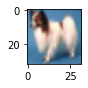

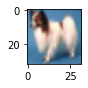

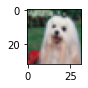

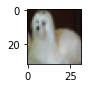

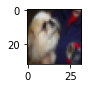

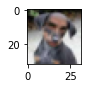

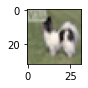

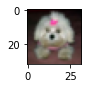

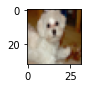

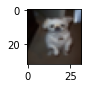

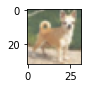

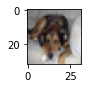

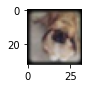

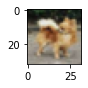

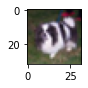

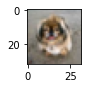

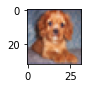

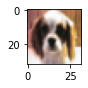

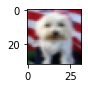

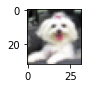

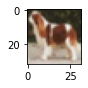

In [15]:
dist_from_first = []
image_dict = {}
index = 4000
first_features = vals[1][index]
first_image = x_train[index][:,:,:]
print(first_image.shape)

# hash images:
for idx in range(x_train.shape[0]):
    image_dict[str(vals[1][idx])] = x_train[idx] 

plt.clf()
plt.imshow(first_image)
plt.show()

for idx, item in enumerate(vals[1]):
    dist_from_first.append((np.linalg.norm(first_features-item), (str(item))))

dist_from_first.sort()
# print(dist_from_first)

for i in range(20):
    plt.clf()
    img = image_dict[dist_from_first[i][1]]
    plt.imshow(img)
    plt.show()

In [16]:
# Save Model:

model.save('Cifar_100_RN50.h5')